# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Week-2:-Multiple-Regression" data-toc-modified-id="Week-2:-Multiple-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Week 2: Multiple Regression</a></div><div class="lev2 toc-item"><a href="#Training-Exercise-2.1" data-toc-modified-id="Training-Exercise-2.1-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Training Exercise 2.1</a></div><div class="lev3 toc-item"><a href="#Questions:" data-toc-modified-id="Questions:-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Questions:</a></div><div class="lev3 toc-item"><a href="#Solution:" data-toc-modified-id="Solution:-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Solution:</a></div><div class="lev4 toc-item"><a href="#Get-Data" data-toc-modified-id="Get-Data-1121"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>Get Data</a></div><div class="lev4 toc-item"><a href="#Part-A-Solution" data-toc-modified-id="Part-A-Solution-1122"><span class="toc-item-num">1.1.2.2&nbsp;&nbsp;</span>Part A Solution</a></div><div class="lev5 toc-item"><a href="#Part-A-Code" data-toc-modified-id="Part-A-Code-11221"><span class="toc-item-num">1.1.2.2.1&nbsp;&nbsp;</span>Part A Code</a></div><div class="lev5 toc-item"><a href="#Answer-Part-A" data-toc-modified-id="Answer-Part-A-11222"><span class="toc-item-num">1.1.2.2.2&nbsp;&nbsp;</span>Answer Part A</a></div><div class="lev4 toc-item"><a href="#Part-B-Solution" data-toc-modified-id="Part-B-Solution-1123"><span class="toc-item-num">1.1.2.3&nbsp;&nbsp;</span>Part B Solution</a></div><div class="lev5 toc-item"><a href="#Part-B-Code" data-toc-modified-id="Part-B-Code-11231"><span class="toc-item-num">1.1.2.3.1&nbsp;&nbsp;</span>Part B Code</a></div><div class="lev5 toc-item"><a href="#Answer-Part-B-(i)-and-(ii)" data-toc-modified-id="Answer-Part-B-(i)-and-(ii)-11232"><span class="toc-item-num">1.1.2.3.2&nbsp;&nbsp;</span>Answer Part B (i) and (ii)</a></div>

# Week 2: Multiple Regression

## Training Exercise 2.1

### Questions:


a. Regress log-wage on a constant and the gender dummy ‘Female’, and check the result presented in Lecture 2.1 that:  

$$log(Wage) = 4.73 − 0.25Female + e$$.  
b. Let $e$ be the series of residuals of the regression in part (a). Perform two regressions: 

    (i) e on a constant and education;  
    (ii) e on a constant and the part-time job dummy.  
    
c. Comment on the outcomes of regressions (i) and (ii) of part (b).

**TrainExer21 Data**  

Simulated wage data set of 500 employees (fixed country, labor sector, and year).  
    
    • Age: age in years (scale variable, 20-70)
    • Educ: education level (catergorical variable, values 1, 2, 3, 4)
    • Female: gender (dummy variable, 1 for females, 0 for males)
    • Parttime: parttime job (dummy variable, 1 if job for at most 3 days per week, 0 if job for more than 3 days per week)
    • Wageindex: yearly wage (scale variable, indexed such that median is equal to 100)
    • Logwageindex: natural logarithm of Wageindex

### Solution:

#### Get Data

In [1]:
import pandas as pd

In [2]:
file_location="./data/TrainExer21.xls"

TrainExer1 = pd.read_excel(file_location)
TrainExer1.head()

,Observation,Wage,LogWage,Female,Age,Educ,Parttime
0,1,66,4.189655,0,49,1,1
1,2,34,3.526361,1,42,1,1
2,3,70,4.248495,1,42,1,1
3,4,47,3.850148,0,38,1,0
4,5,107,4.672829,1,54,1,1


#### Part A Solution
##### Part A Code 

In [3]:
from sklearn import linear_model as lm
import numpy as np

In [4]:
X = TrainExer1.Female.values.reshape(-1,1) # sklearn expects the feature (independent variable to be in a shape (N,1))
Y = TrainExer1.LogWage # sklearn expects the feature (dependent variable to be in a shape (N,)). Test using X.shape

In [5]:
model = lm.LinearRegression()
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### Answer Part A

In [6]:
print(" The model coefficient is: ", model.coef_)
print(" The model intercept is: ", model.intercept_)

 The model coefficient is:  [-0.25064253]
 The model intercept is:  4.73364433823


Comparing the above result with the lecture brings the values fairly close. **4.7333644** vs **4.73** and **-0.25064** vs **-0.25**.  Both the results are wtihin rounding differences. The above results can be resprsented visually as below.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

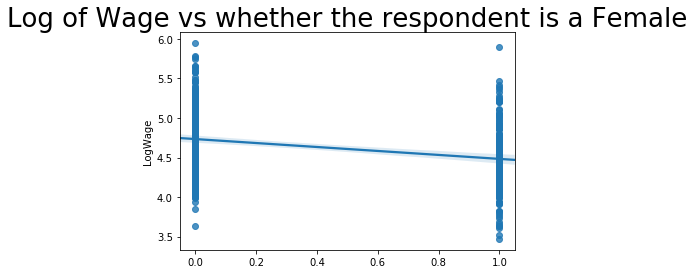

In [8]:
plot = sns.regplot(X,Y)
plot.axes.set_title("Log of Wage vs whether the respondent is a Female", fontsize = 26)

#### Part B Solution
##### Part B Code 

In [9]:
a = model.intercept_
b = model.coef_

In [10]:
TrainExer1["e"] = TrainExer1.LogWage - a + b*TrainExer1.Female
TrainExer1.head() # sample data with residuals based on equation in A above.

,Observation,Wage,LogWage,Female,Age,Educ,Parttime,e
0,1,66,4.189655,0,49,1,1,-0.543990
1,2,34,3.526361,1,42,1,1,-1.457926
2,3,70,4.248495,1,42,1,1,-0.735792
3,4,47,3.850148,0,38,1,0,-0.883497
4,5,107,4.672829,1,54,1,1,-0.311458


In [11]:
## Regressing e on education
X_educ = TrainExer1.Educ.values.reshape(-1,1)
X_job = TrainExer1.Parttime.values.reshape(-1,1)
Y_error = TrainExer1.e

In [12]:
model2 = lm.LinearRegression()
model2.fit(X_educ,Y_error)

model3 = lm.LinearRegression()
model3.fit(X_job,Y_error)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### Answer Part B (i) and (ii)

In [13]:
print(" The model 2 with error & education coefficient is: ", model2.coef_)
print(" The model 2 with error & education intercept is: ", model2.intercept_)

print(" The model 3 with error & part time job coefficient is: ", model3.coef_)
print(" The model 3 with error & part time job intercept is: ", model3.intercept_)

 The model 2 with error & education coefficient is:  [ 0.26935618]
 The model 2 with error & education intercept is:  -0.744195043007
 The model 3 with error & part time job coefficient is:  [-0.04313759]
 The model 3 with error & part time job intercept is:  -0.172049277169


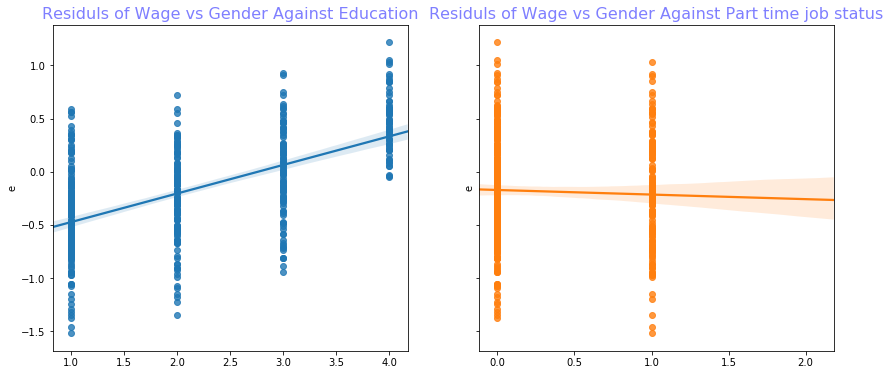

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(X_educ, Y_error, ax = ax1)
ax1.figure.set_size_inches(14,6)
ax1.axes.set_title('Residuls of Wage vs Gender Against Education', fontsize=16,color="b",alpha=0.5)

sns.regplot(X_job, Y_error, ax = ax2)
ax2.figure.set_size_inches(14,6)
ax2.axes.set_title('Residuls of Wage vs Gender Against Part time job status', fontsize=16,color="b",alpha=0.5)